In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [28]:
import warnings
warnings.filterwarnings(action="ignore")

## Load Processed Data

In [12]:
train_data = pd.read_csv("../data/train_processed_data.csv")
train_data.drop("Unnamed: 0",axis=1,inplace=True)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,-1.481411,-0.262831,-0.335514,-0.123297,0.683058,-1.492419,-0.094636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0
1,-0.536103,-0.369026,-0.335335,-0.230177,0.505376,-0.522977,-0.006963,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0
2,0.148821,-0.380366,-0.301520,-0.282502,0.683058,0.169482,0.055627,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
3,-0.298361,-0.329487,-0.335514,-0.258848,-0.560711,-0.245993,0.016423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,-1.390843,-0.361408,-0.325133,-0.201263,-0.738393,-1.353927,-0.024703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [13]:
# Check Dimentions of Training Data
train_data.shape

(75600, 16)

Data is huge with 75600 records, so we will sample smaller training sets so we can train many different models in a reasonable time.e

In [18]:
train_subset = train_data.sample(15_000,random_state=42)

In [25]:
X,y = train_subset.drop("target",axis=1),train_subset['target']

## Shortlist Promising Models

In [135]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score

def validate_model(model,X,y,scoring="accuracy",cv=3):
    score = cross_val_score(estimator=model,X=X,y=y,scoring=scoring,cv=cv)
    print(f"{scoring.title()} Mean= {np.mean(score):.2%}")
    print(f"{scoring.title()} Std= {np.std(score):.2}")

    preds = cross_val_predict(estimator=model,X=X,y=y,cv=cv)
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_true=y,y_pred=preds)

    f1 = f1_score(y,preds)
    roc_auc = roc_auc_score(y,preds)
    # Precision, Recall ,ROC AUC and F1 Scores
    print(f"Precision= {precision_score(y,preds):.2%}")
    print(f"Recall= {recall_score(y,preds):.2%}")
    print(f"F1= {f1:.2%}")
    print(f"ROC AUC= {roc_auc:.2%}")
    return f1,roc_auc

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Accuracy Mean= 89.09%
Accuracy Std= 0.0026
Precision= 85.26%
Recall= 74.50%
F1= 79.52%
ROC AUC= 84.69%


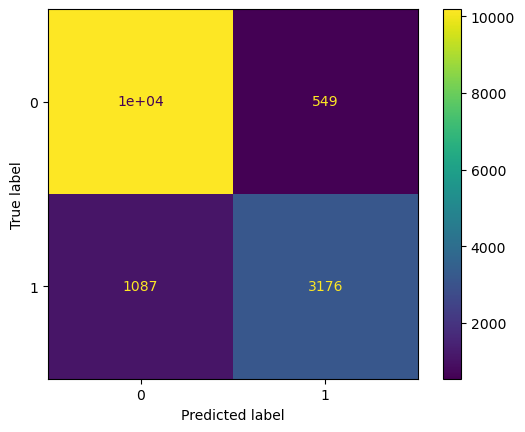

In [136]:
log_reg_f1,log_reg_roc_auc = validate_model(log_reg,X,y)

### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [101]:
gauss_nb = GaussianNB()
gauss_nb.fit(X,y)

GaussianNB()

Accuracy Mean= 71.61%
Accuracy Std= 0.0019
Precision= 50.02%
Recall= 99.93%
F1= 66.67%
ROC AUC= 80.15%


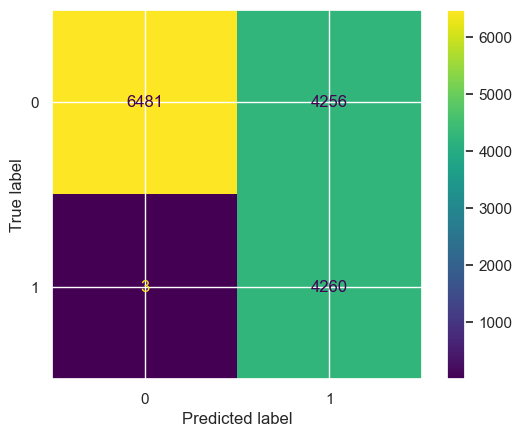

In [162]:
gauss_nb_f1,gauss_nb_roc_auc = validate_model(gauss_nb,X,y)

In [139]:
bern_nb = BernoulliNB()
bern_nb.fit(X,y)

BernoulliNB()

Accuracy Mean= 85.54%
Accuracy Std= 0.0042
Precision= 77.05%
Recall= 69.95%
F1= 73.33%
ROC AUC= 80.84%


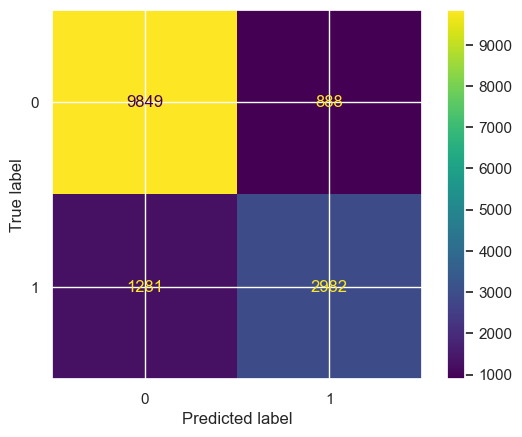

In [163]:
bern_nb_f1,bern_nb_roc_auc = validate_model(bern_nb,X,y)

### SVM

In [105]:
from sklearn.svm import LinearSVC,SVC

In [106]:
linr_svc = LinearSVC()
linr_svc.fit(X,y)

LinearSVC()

Accuracy Mean= 91.85%
Accuracy Std= 0.0032
Precision= 91.15%
Recall= 78.98%
F1= 84.63%
ROC AUC= 87.97%


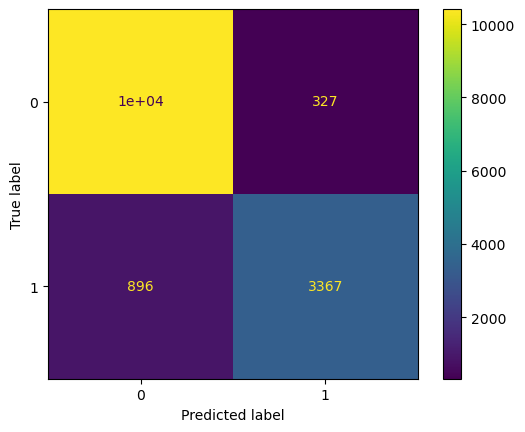

In [142]:
linr_svc_f1,linr_svc_roc_auc = validate_model(linr_svc,X,y)

### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

Accuracy Mean= 93.07%
Accuracy Std= 0.0028
Precision= 90.36%
Recall= 84.64%
F1= 87.40%
ROC AUC= 90.52%


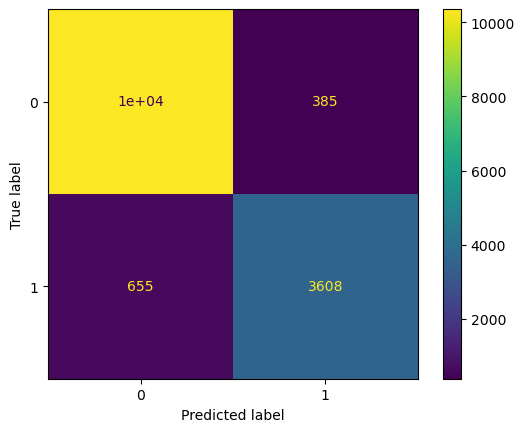

In [143]:
knn_f1,knn_roc_auc = validate_model(knn,X,y)

### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)

DecisionTreeClassifier()

Accuracy Mean= 97.70%
Accuracy Std= 0.0042
Precision= 95.10%
Recall= 96.50%
F1= 95.80%
ROC AUC= 97.27%


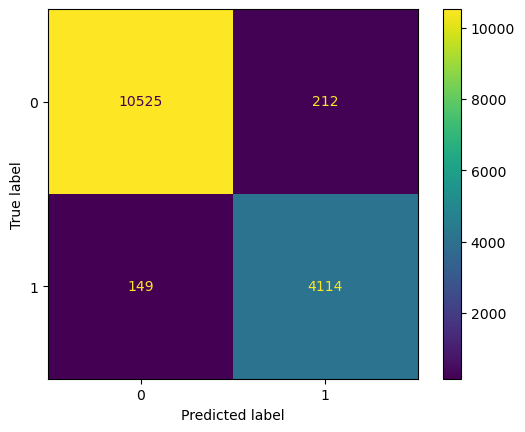

In [144]:
tree_f1,tree_roc_auc = validate_model(tree_clf,X,y)

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X,y)

RandomForestClassifier()

Accuracy Mean= 98.24%
Accuracy Std= 0.001
Precision= 96.64%
Recall= 97.11%
F1= 96.88%
ROC AUC= 97.89%


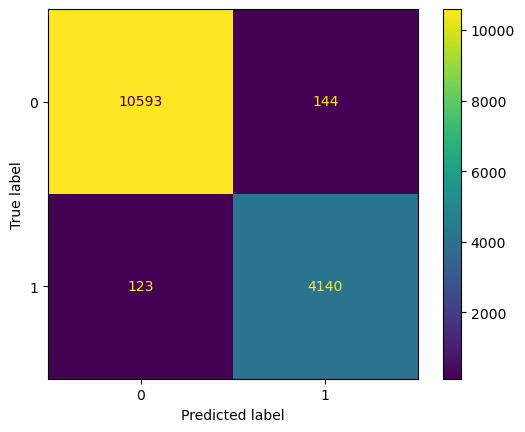

In [145]:
forest_f1,forest_roc_auc = validate_model(forest_clf,X,y)

### XGB

In [122]:
from xgboost import XGBClassifier

In [123]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Mean= 98.69%
Accuracy Std= 0.00098
Precision= 97.06%
Recall= 98.38%
F1= 97.72%
ROC AUC= 98.60%


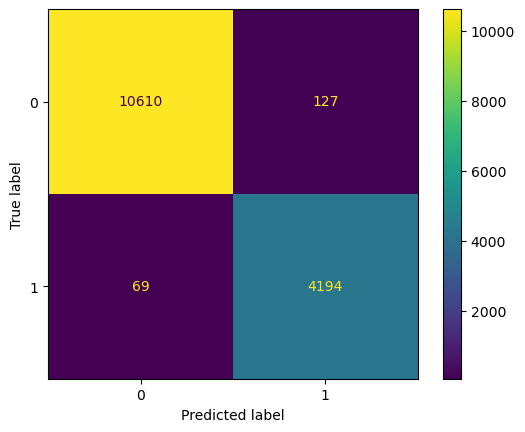

In [146]:
xgb_f1,xgb_roc_auc = validate_model(xgb_clf,X,y)

## Compare Models

In [164]:
results = [("Logistic Regression",log_reg_f1,log_reg_roc_auc),
("Gaussian NB",gauss_nb_f1,gauss_nb_roc_auc),
("Bernoulli NB",bern_nb_f1,bern_nb_roc_auc),
("Linear SVC",linr_svc_f1,linr_svc_roc_auc),
("KNN",knn_f1,knn_roc_auc),
("Decision Tree",tree_f1,tree_roc_auc),
("Random Forest",forest_f1,forest_roc_auc),
("XGB",xgb_f1,xgb_roc_auc)]
results = pd.DataFrame(results)
results.columns = ["Algorithm","F1","ROC_AUC"]
results

,Algorithm,F1,ROC_AUC
0,Logistic Regression,0.795193,0.846942
1,Gaussian NB,0.666719,0.801455
2,Bernoulli NB,0.733309,0.808401
3,Linear SVC,0.846299,0.879682
4,KNN,0.874031,0.905248
5,Decision Tree,0.957969,0.972652
6,Random Forest,0.968761,0.978868
7,XGB,0.977167,0.985993


In [171]:
results_melted = results.melt(id_vars=["Algorithm"], value_vars=["F1", "ROC_AUC"], 
                                    var_name="Metric", value_name="Score")
results_melted

,Algorithm,Metric,Score
0,Logistic Regression,F1,0.795193
1,Gaussian NB,F1,0.666719
2,Bernoulli NB,F1,0.733309
3,Linear SVC,F1,0.846299
4,KNN,F1,0.874031
5,Decision Tree,F1,0.957969
6,Random Forest,F1,0.968761
7,XGB,F1,0.977167
8,Logistic Regression,ROC_AUC,0.846942
9,Gaussian NB,ROC_AUC,0.801455


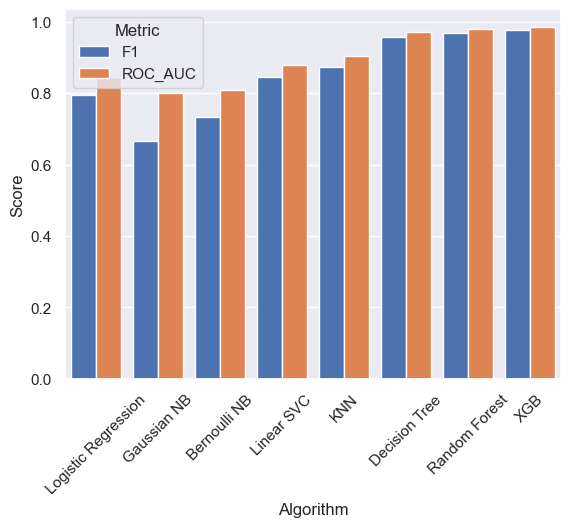

In [172]:
sns.barplot(data=results_melted,x="Algorithm",y="Score",hue="Metric",saturation=1)
plt.xticks(rotation=45)
plt.show()

We will choose best model they make different types of erros:
- SVC
- KNN
- Decision Tree
- XGB

## Store Best Models

In [176]:
# Save The Models
from joblib import dump

In [178]:
dump(linr_svc,"../models/svc.joblib")
dump(knn,"../models/knn.joblib")
dump(tree_clf,"../models/decision_tree.joblib")
dump(xgb_clf,"../models/xgb.joblib")

['../models/xgb.joblib']